# Quais os nomes mais famosos no Brasil?

Para respondermos a essa pergunta, contamos a frequência de cada nome no Brasil e ordenamos colocando os mais frequentes no topo. Em seguida, vamos criar uma nuvem de palavras para visualizar essas informações.

Criamos então a função generate_list_sorted_by_freq que faz a agregação dos nomes na tabela contando quantas vezes cada um aparece, e ordenamos a lista de acordo com os nomes mais frequentes. O código segue mais abaixo.

Para criar a imagem, usamos a biblioteca wordcloud junto ao matplotlib, disponíveis para instalação via pip. A wordcloud nos possibilita gerar uma imagem com as palavras onde o tamanho de cada uma é determinado pela sua frequência, gerando um belo efeito visual para nosso ranking

In [29]:
import numpy as np
import basedosdados as bd
import matplotlib.pyplot as plt

from decouple import AutoConfig
from wordcloud import WordCloud

config = AutoConfig(' ')

In [31]:
def visualize_wordcloud(word_dict):
    x, y = np.ogrid[:1000, :1000]
    mask = 2*(x - 500) ** 2 + (y - 500) ** 2 > 500 ** 2
    mask = 255 * mask.astype(int)

    wc = WordCloud(background_color="white", mask=mask)
    wc.fit_words(word_dict)
    
    plt.rcParams["figure.figsize"] = 8, 8
    plt.axis("off")
    plt.imshow(wc)
    plt.show()

In [7]:
df = bd.read_table(
    dataset_id='br_ibge_nomes_brasil',
    table_id='quantidade_municipio_nome_2010',
    billing_project_id=config("PROJECT_ID")
)

Please visit this URL to authorize this application: https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=262006177488-3425ks60hkk80fssi9vpohv88g6q1iqd.apps.googleusercontent.com&redirect_uri=http%3A%2F%2Flocalhost%3A8080%2F&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform&state=f7WtY5Zii6lyup9rNMBIgFJVPjapn5&access_type=offline


Downloading: 100%|██████████| 1959116/1959116 [01:28<00:00, 22085.53rows/s]


In [8]:
df = df.rename(columns={'qtde_nascimentos_ate_2010': 'freq', 'nome': 'name'})

df

,id_municipio,name,quantidade_nascimentos_ate_2010
0,1100015,Ademir,46
1,1100015,Adriana,60
2,1100015,Aline,77
3,1100015,Amanda,51
4,1100015,Ana,300
...,...,...,...
1959111,5300108,Valdenora,45
1959112,5300108,Valdinete,45
1959113,5300108,Vantuir,45
1959114,5300108,Wandeson,45


In [21]:
name_freq = (df
  .groupby('name')
  .agg(n=('quantidade_nascimentos_ate_2010', sum))
  .sort_values(by='n', ascending=False)
  .reset_index()
)

name_freq

,name,n
0,Maria,11734129
1,Jose,5754470
2,Ana,3089834
3,Joao,2984088
4,Antonio,2576156
...,...,...
33071,Kauara,10
33072,Dmaria,10
33073,Djuliane,10
33074,Riyoko,10


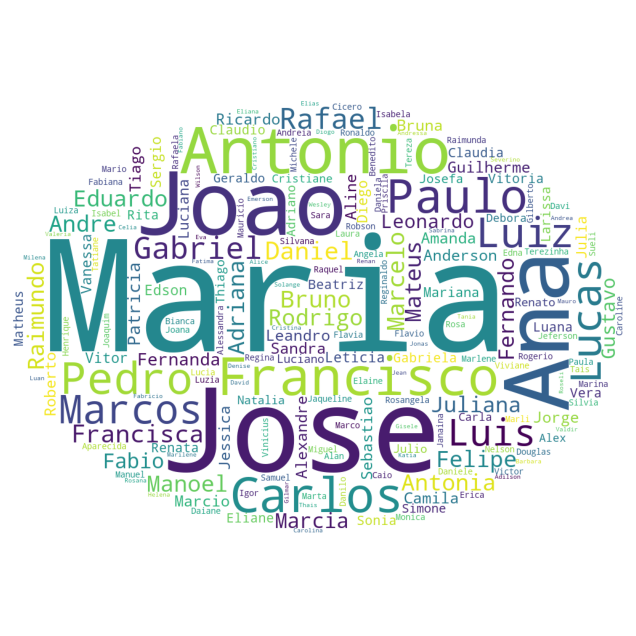

In [30]:
name_freq_dict = name_freq.to_dict(orient='records')
name_freq_dict = {r['name']:r['n'] for r in name_freq_dict}

visualize_wordcloud(name_freq_dict)